In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [57]:
df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


eda

In [3]:
df.columns = [col.lower().strip() for col in df.columns]
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.shape

(400, 26)

In [6]:
# dropping the 'id' column as it is not useful for analysis
df.drop(columns=['id'], inplace=True)
# renaming all column names for better understanding
df.rename(columns={
    'age': 'age','bp': 'blood_pressure','sg': 'specific_gravity',
    'al': 'albumin','su': 'sugar','rbc': 'red_blood_cells','pc': 'pus_cell','pcc': 'pus_cell_clumps','ba': 'bacteria',
    'bgr': 'blood_glucose_random','bu': 'blood_urea','sc': 'serum_creatinine',
    'sod': 'sodium','pot': 'potassium','hemo': 'haemoglobin','pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count','rc': 'red_blood_cell_count','htn': 'hypertension','dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease','appet': 'appetite',
    'pe': 'pedal_edema','ane': 'anemia','classification': 'target'
}, inplace=True)

df.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,target
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [7]:
print(df.dtypes)

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
target                      object
dtype: object


In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type 
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# extracting categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=[np.number])

In [12]:
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print(categorical_cols[col].unique())
    print("\n")

Column: red_blood_cells
[nan 'normal' 'abnormal']


Column: pus_cell
['normal' 'abnormal' nan]


Column: pus_cell_clumps
['notpresent' 'present' nan]


Column: bacteria
['notpresent' 'present' nan]


Column: hypertension
['yes' 'no' nan]


Column: diabetes_mellitus
['yes' 'no' ' yes' '\tno' '\tyes' nan]


Column: coronary_artery_disease
['no' 'yes' '\tno' nan]


Column: appetite
['good' 'poor' nan]


Column: pedal_edema
['no' 'yes' nan]


Column: anemia
['no' 'yes' nan]


Column: target
['ckd' 'ckd\t' 'notckd']




In [13]:
# replace incorrect values in categorical columns
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', ' yes': 'yes','\tyes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no'})
df['target'] = df['target'].replace({'ckd\t': 'ckd'})

In [14]:
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print(categorical_cols[col].unique())
    print("\n")

Column: red_blood_cells
[nan 'normal' 'abnormal']


Column: pus_cell
['normal' 'abnormal' nan]


Column: pus_cell_clumps
['notpresent' 'present' nan]


Column: bacteria
['notpresent' 'present' nan]


Column: hypertension
['yes' 'no' nan]


Column: diabetes_mellitus
['yes' 'no' nan]


Column: coronary_artery_disease
['no' 'yes' nan]


Column: appetite
['good' 'poor' nan]


Column: pedal_edema
['no' 'yes' nan]


Column: anemia
['no' 'yes' nan]


Column: target
['ckd' 'notckd']




In [15]:
#converting target variable to numerical values

df['target'] = df['target'].map({'ckd': 1, 'notckd': 0})
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=[np.number])


In [16]:
# class distribution in the target variable
df['target'].value_counts()

target
1    250
0    150
Name: count, dtype: int64

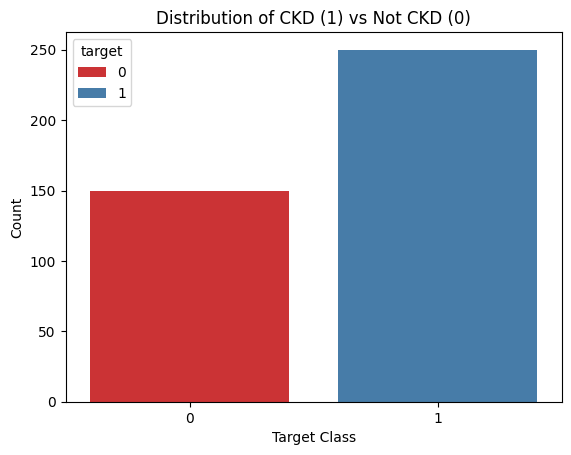

In [17]:
sns.countplot(x='target', data=df,hue='target', palette='Set1')
plt.title('Distribution of CKD (1) vs Not CKD (0)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

Chronic Kidney Disease (CKD) is more prevalent than non-CKD in this dataset.

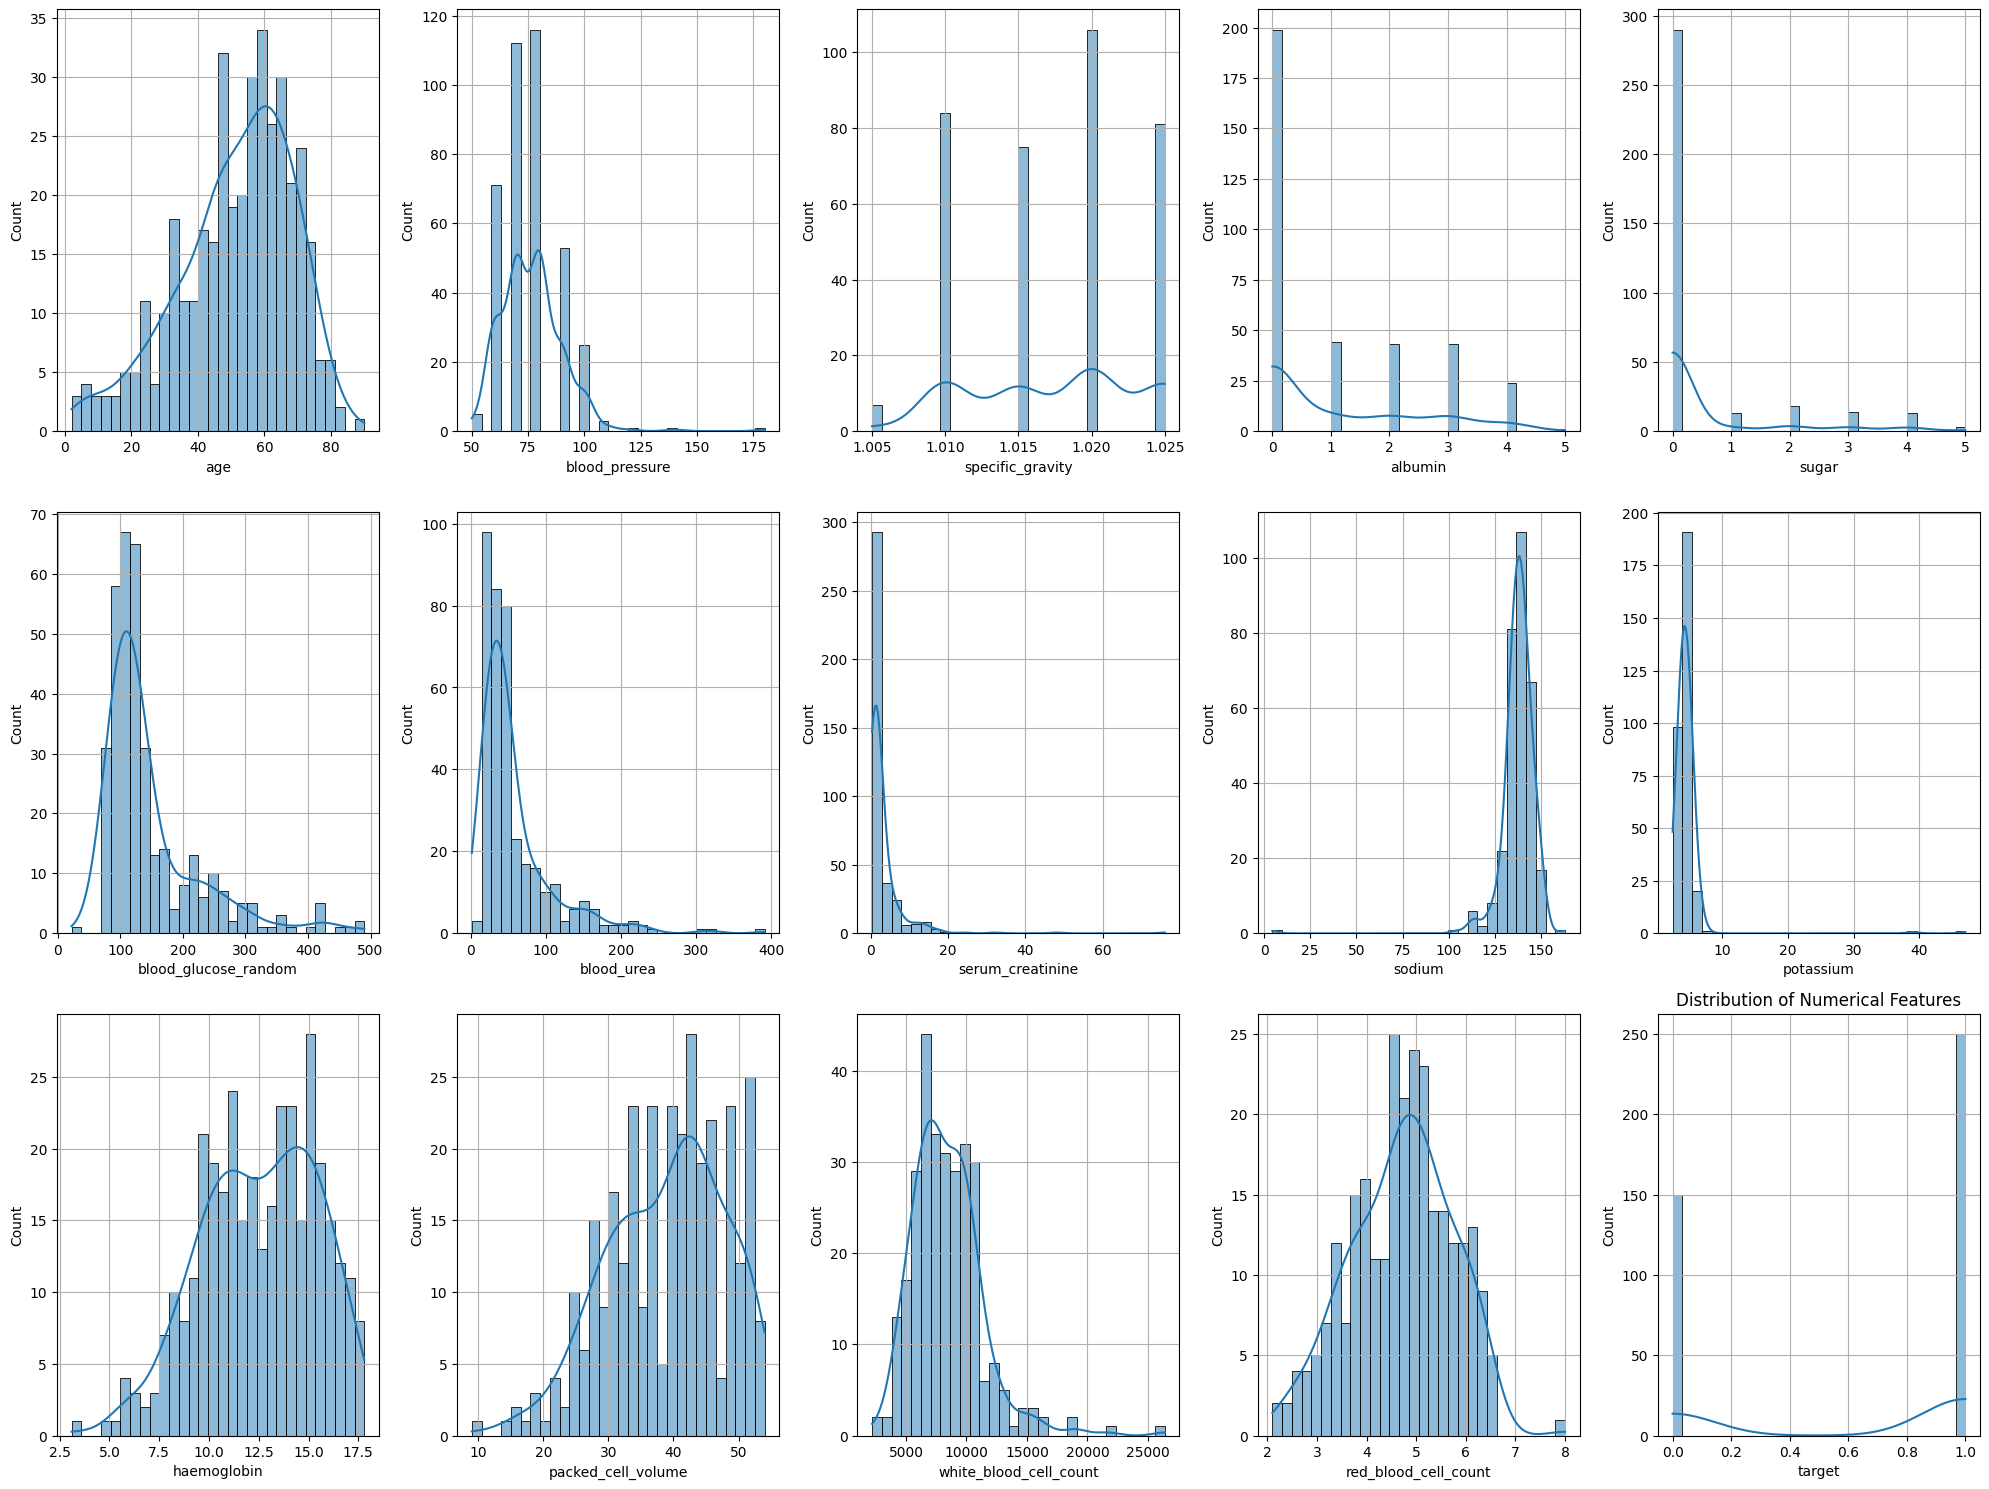

In [18]:
#visualizing the distribution of numerical features
plt.figure(figsize=(20,15))
plotnum=1

for col in numerical_cols:
    if plotnum <= len(numerical_cols.columns):    
        ax = plt.subplot(3, 5,plotnum)
        plt.grid(True)
        sns.histplot(df[col],kde=True, ax=ax, bins=30,alpha=0.5)
        plt.xlabel(col)
    plotnum += 1
plt.title('Distribution of Numerical Features')
plt.tight_layout()
plt.grid(True)
plt.show()

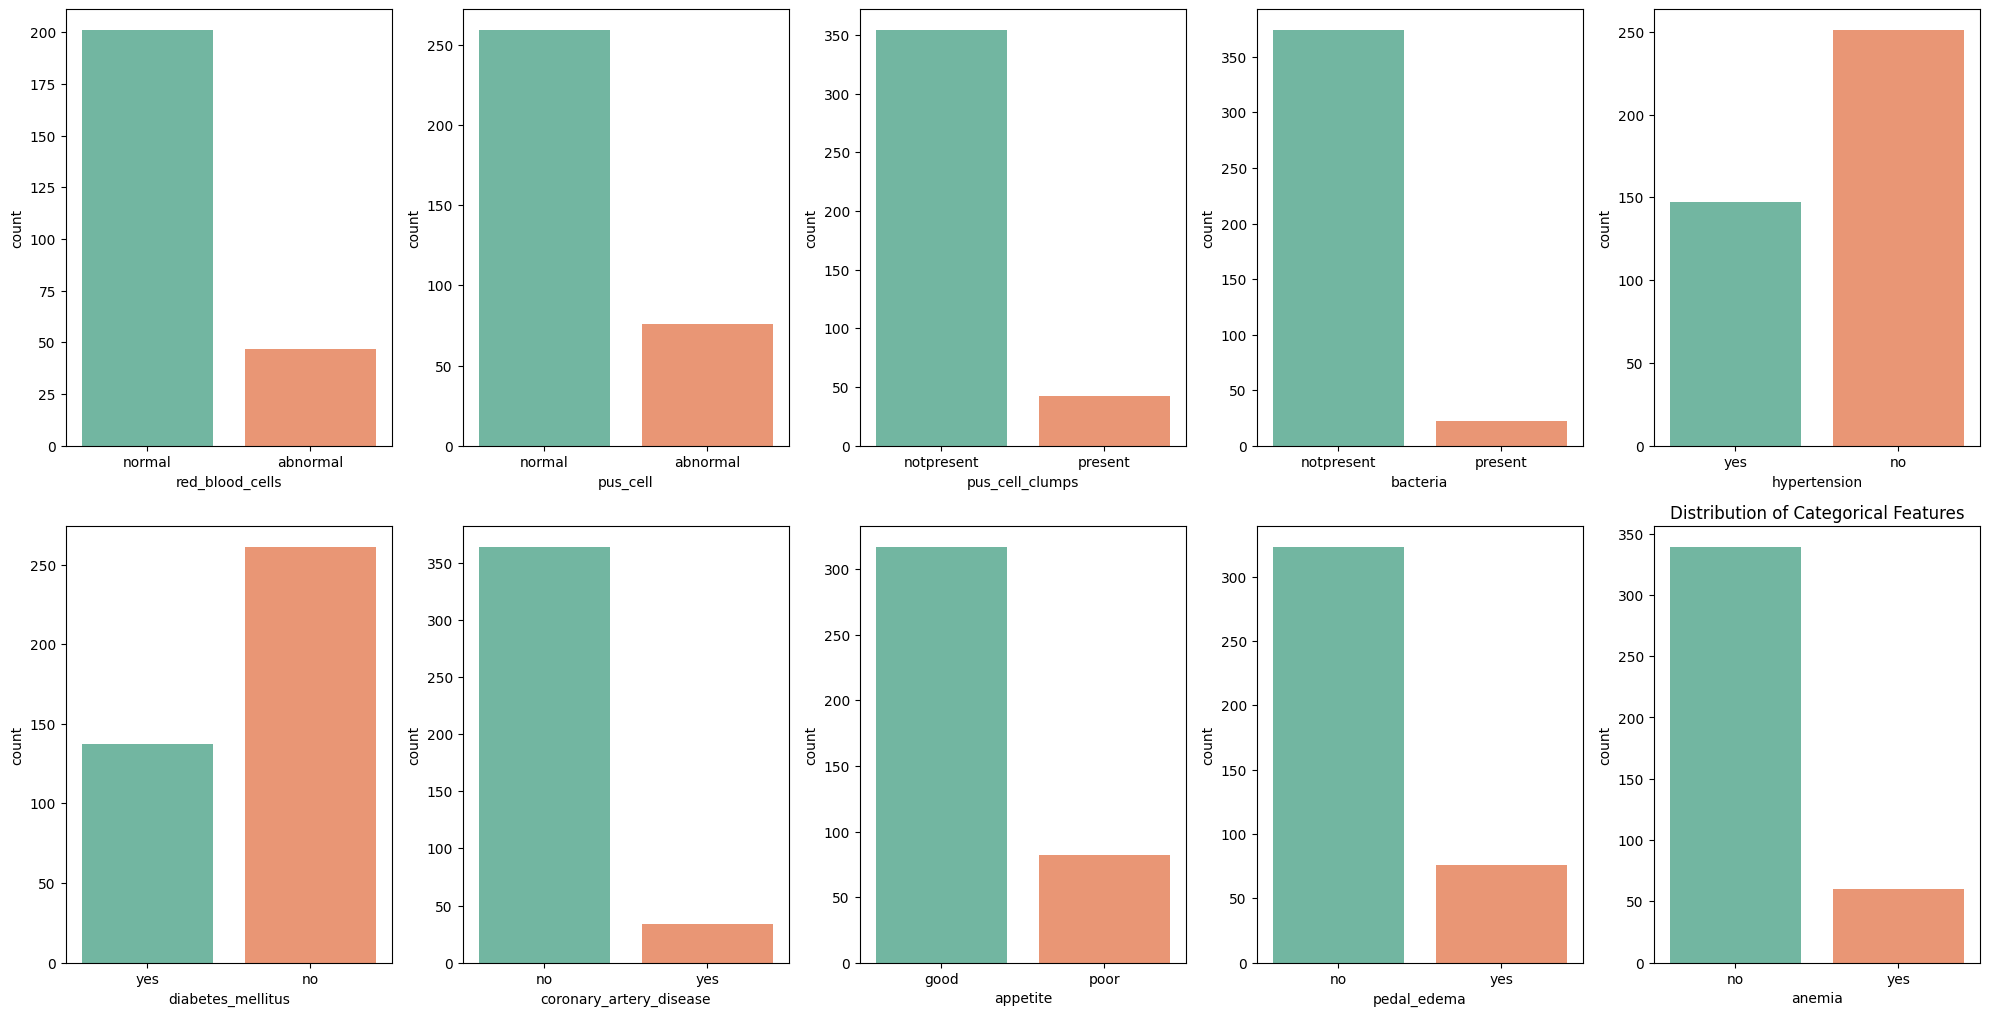

In [19]:
# Visualizing the distribution of categorical features
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_cols.columns, 1):
    plt.subplot(3, 5, i)
    sns.countplot(data=df, x=col,hue=col, palette='Set2',legend=False)

plt.title('Distribution of Categorical Features')
plt.tight_layout()
plt.show()

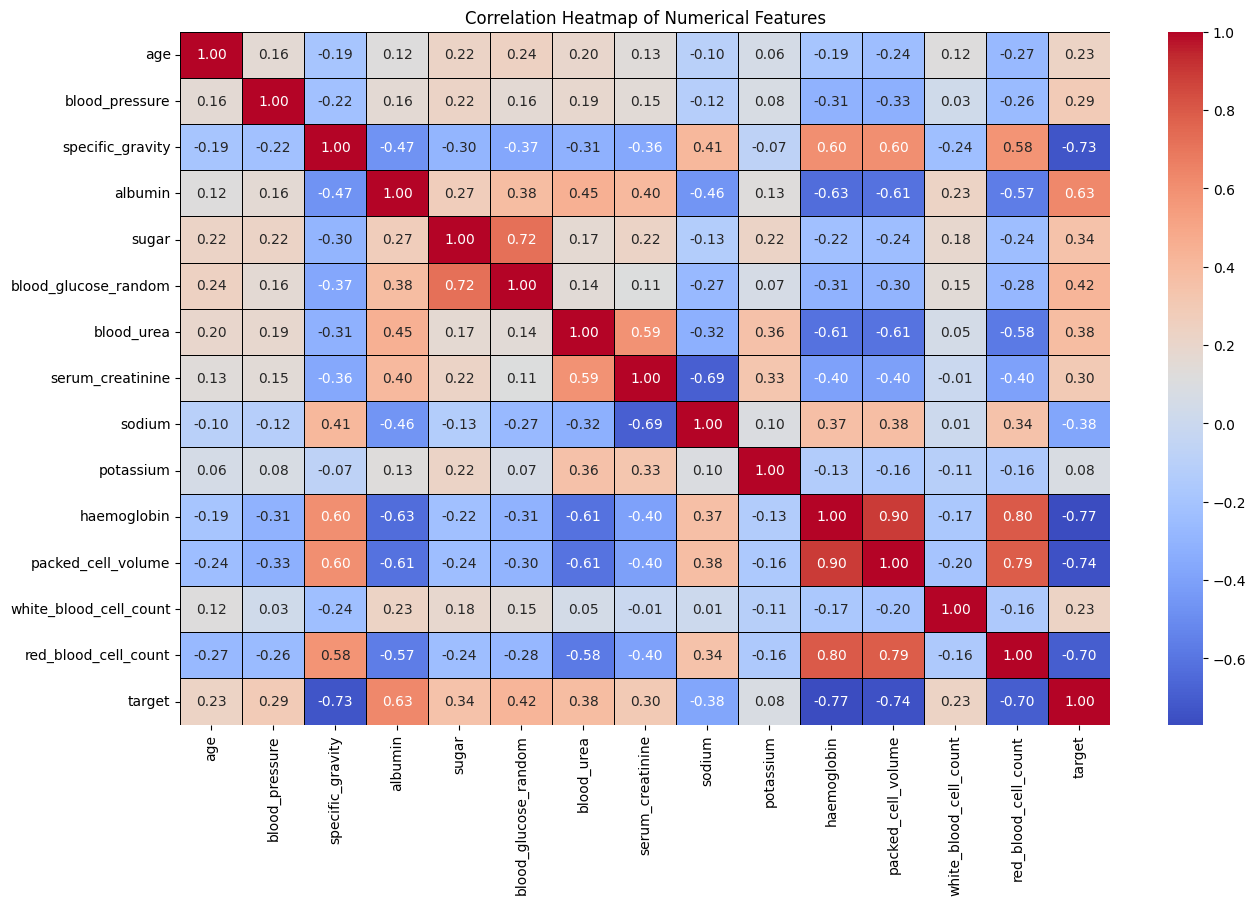

In [20]:
# heatmap to visualize the correlation between numerical features
plt.figure(figsize=(15, 9))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [21]:
# Violin plot
def violin(col):
    fig = px.violin(df, y=col, x="target", color="target", box=True, template='ggplot2')
    fig.update_layout(title=f'Violin Plot of {col} by Target Class')
    fig.show()

# KDE Plot
def kde(col):
    grid = sns.FacetGrid(df, hue="target", height=6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    grid.set_titles(f'KDE Plot of {col} by Target Class')

# Scatter plot
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="target", template='ggplot2')
    fig.update_layout(title=f'Scatter Plot of {col1} vs {col2} by Target Class')
    fig.show()

In [22]:
violin('white_blood_cell_count')

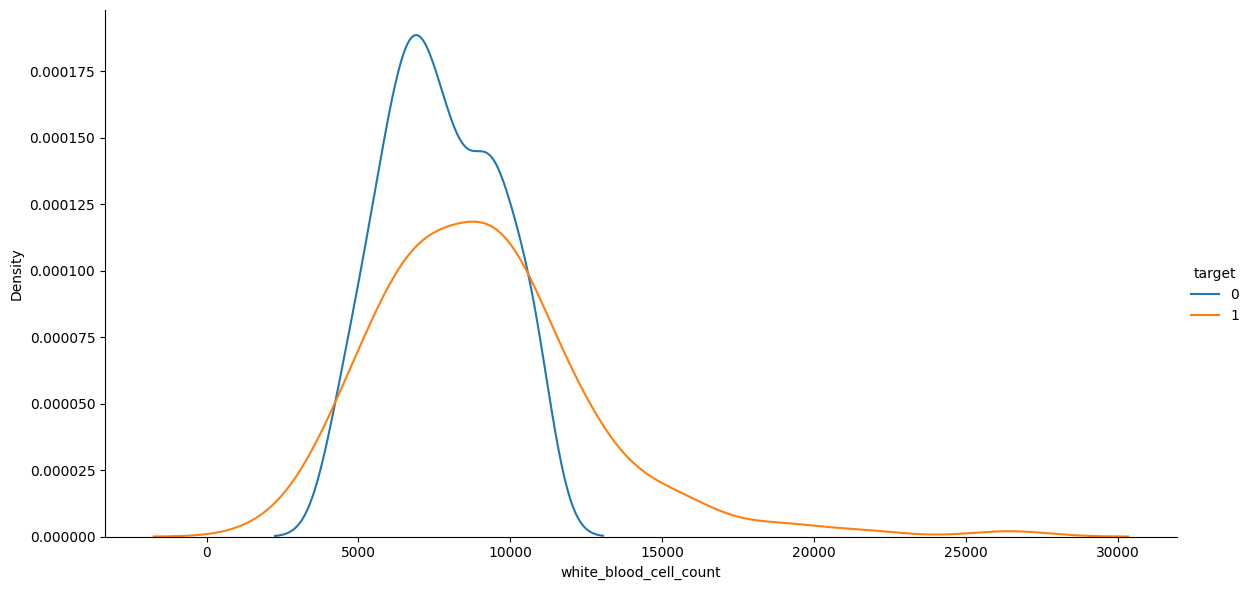

In [23]:
kde('white_blood_cell_count')

In [24]:
violin('blood_pressure')

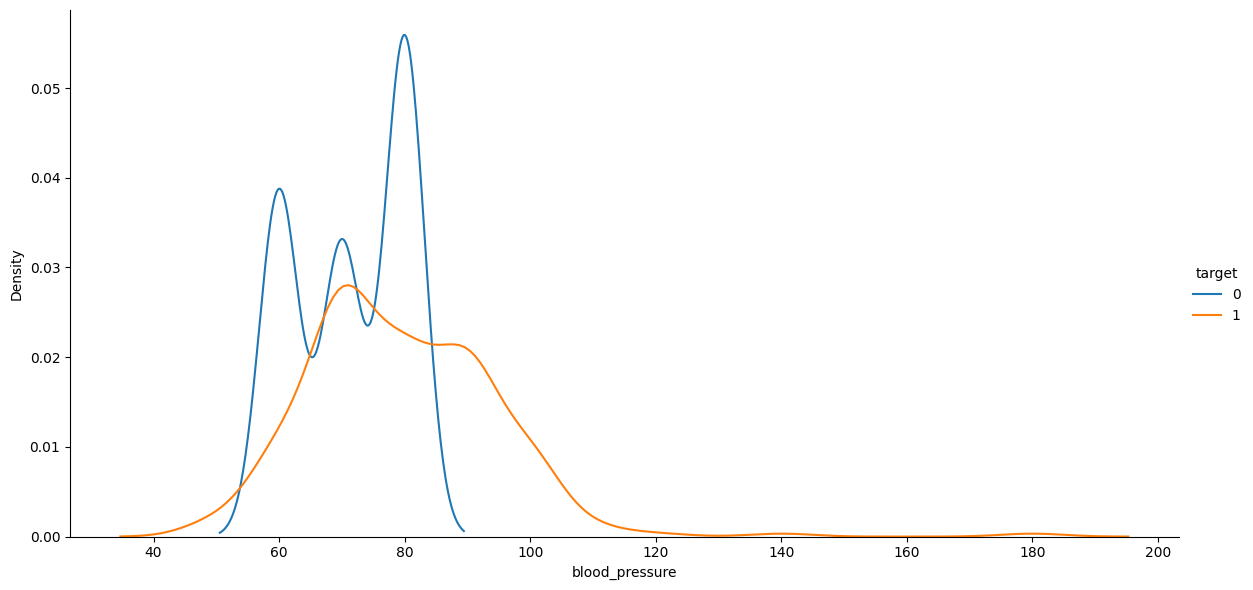

In [25]:
kde('blood_pressure')

In [26]:
violin('packed_cell_volume')

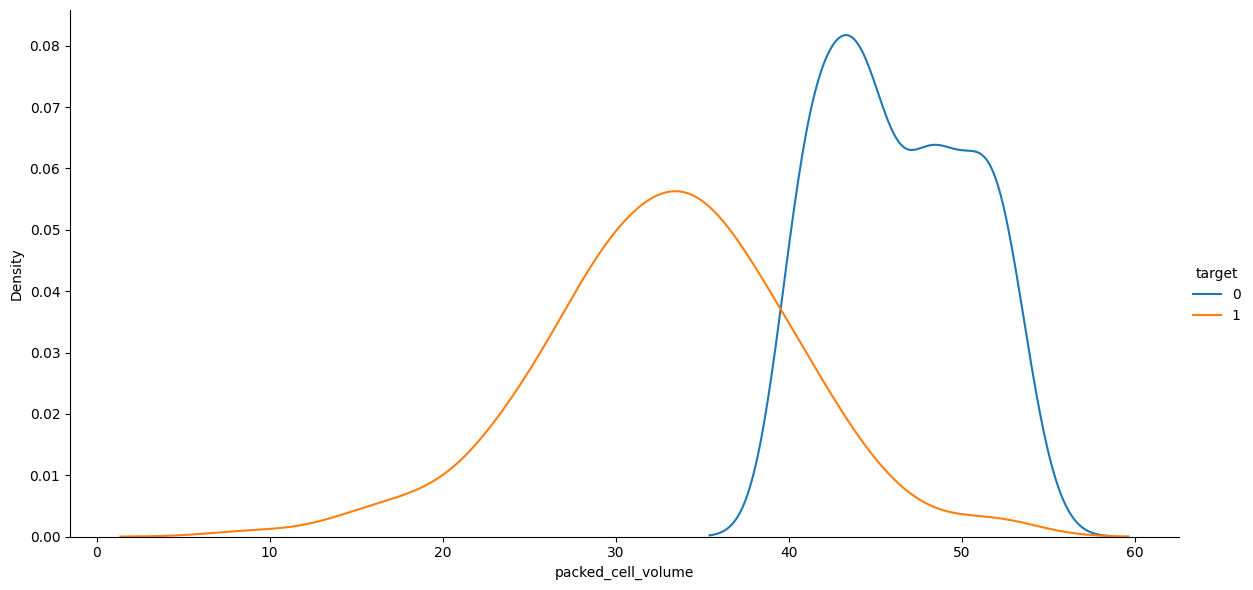

In [27]:
kde('packed_cell_volume')

In [28]:
violin('haemoglobin')

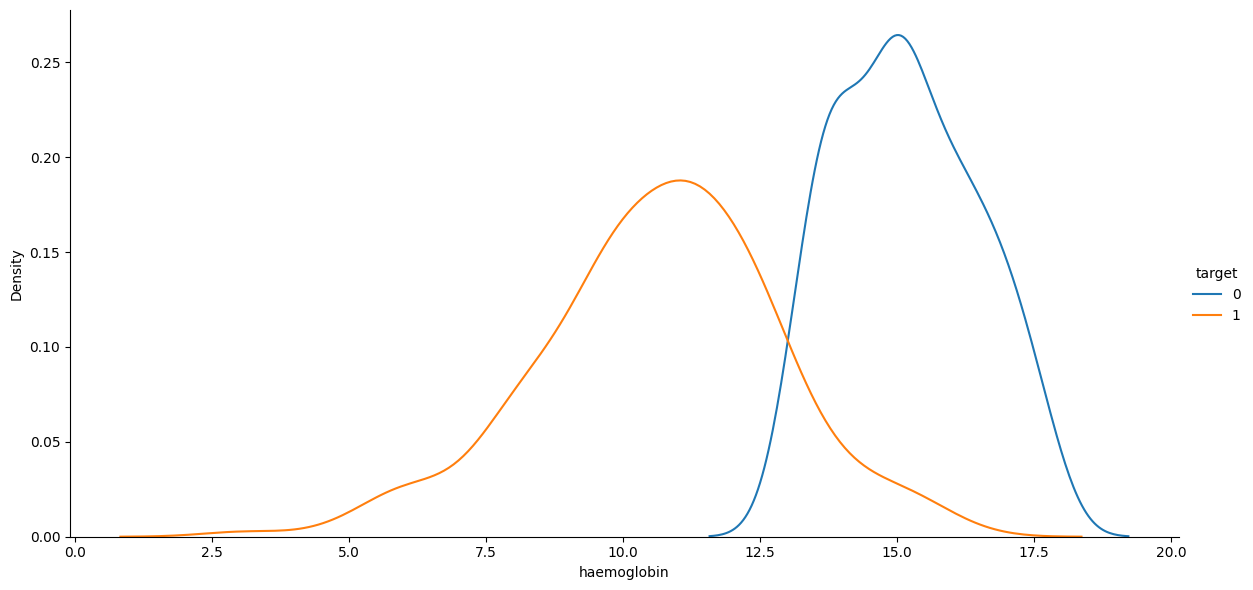

In [29]:
kde('haemoglobin')

In [30]:
violin('sodium')

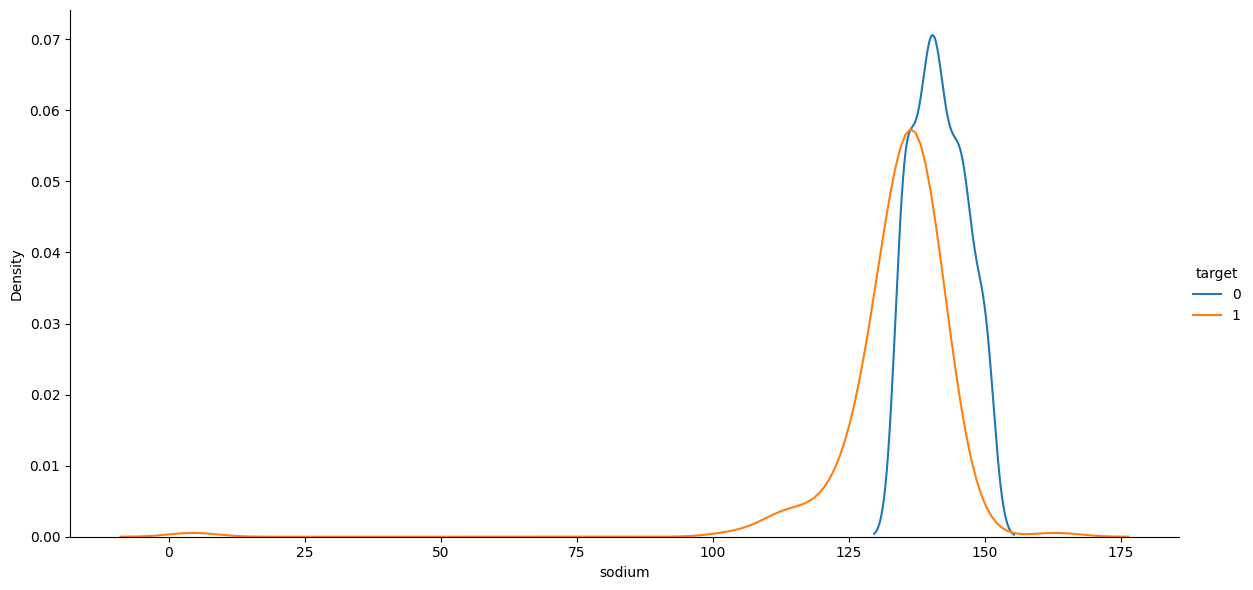

In [31]:
kde('sodium')

In [32]:
violin('red_blood_cell_count')

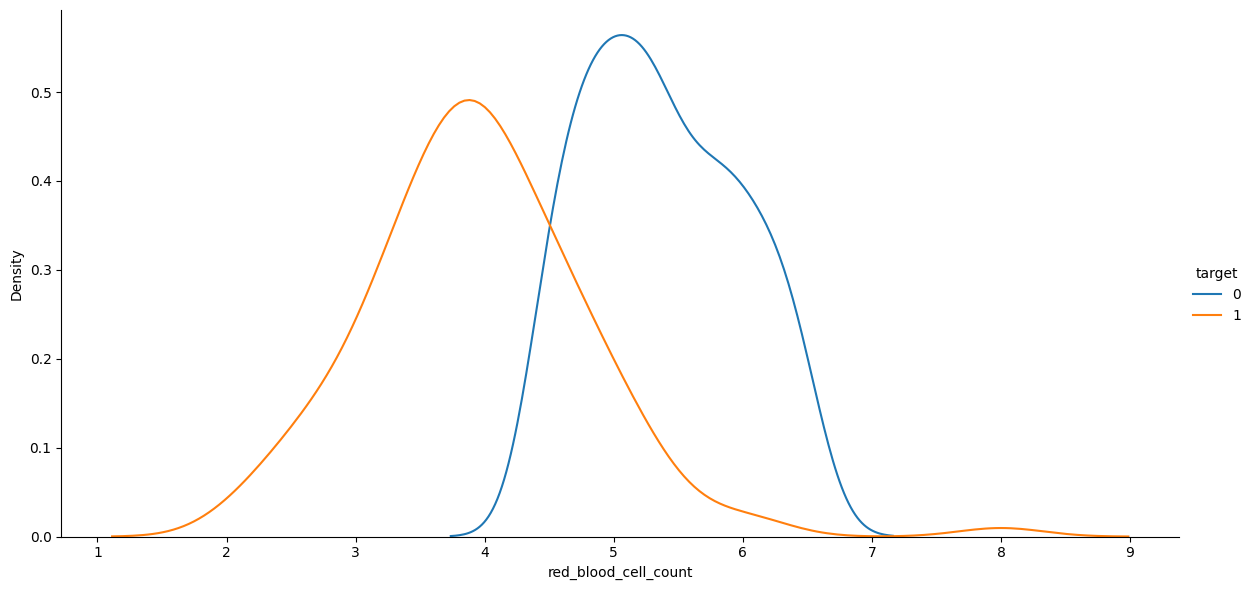

In [33]:
kde('red_blood_cell_count')

In [34]:
violin('specific_gravity')

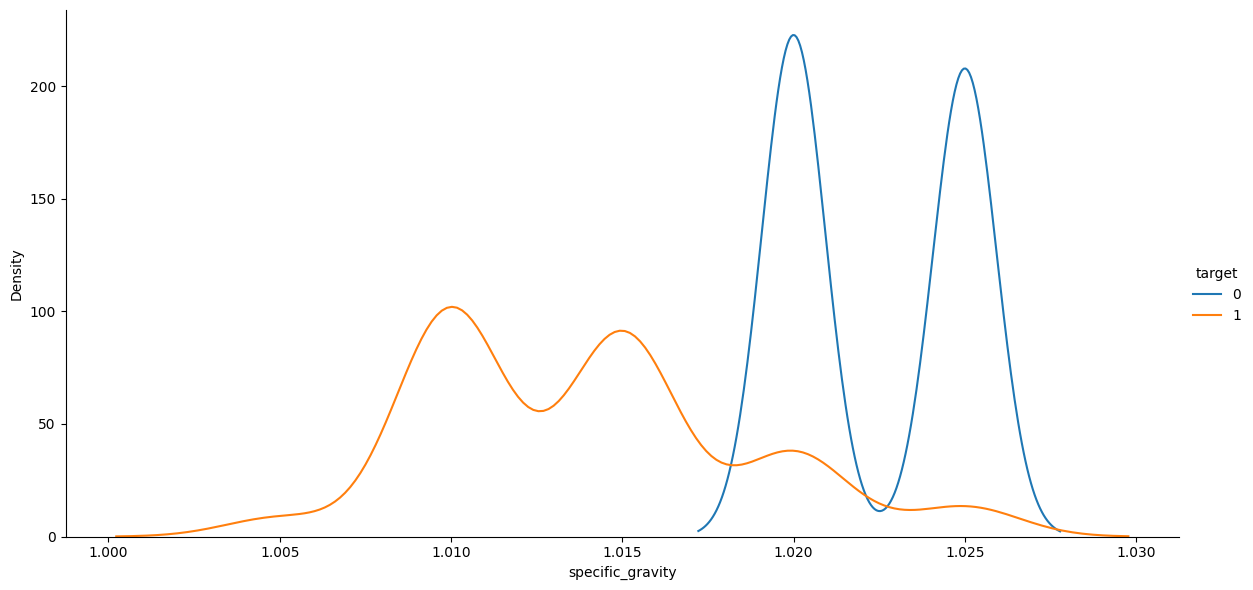

In [35]:
kde('specific_gravity')

In [36]:
violin('potassium')

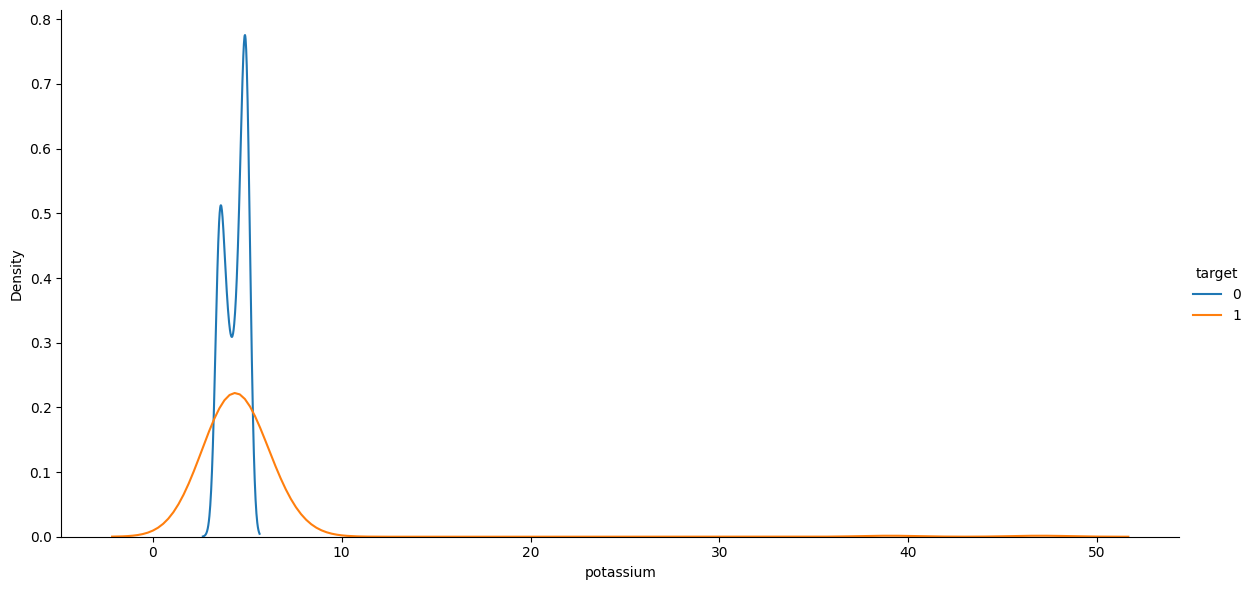

In [37]:
kde('potassium')

In [38]:
violin('albumin')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



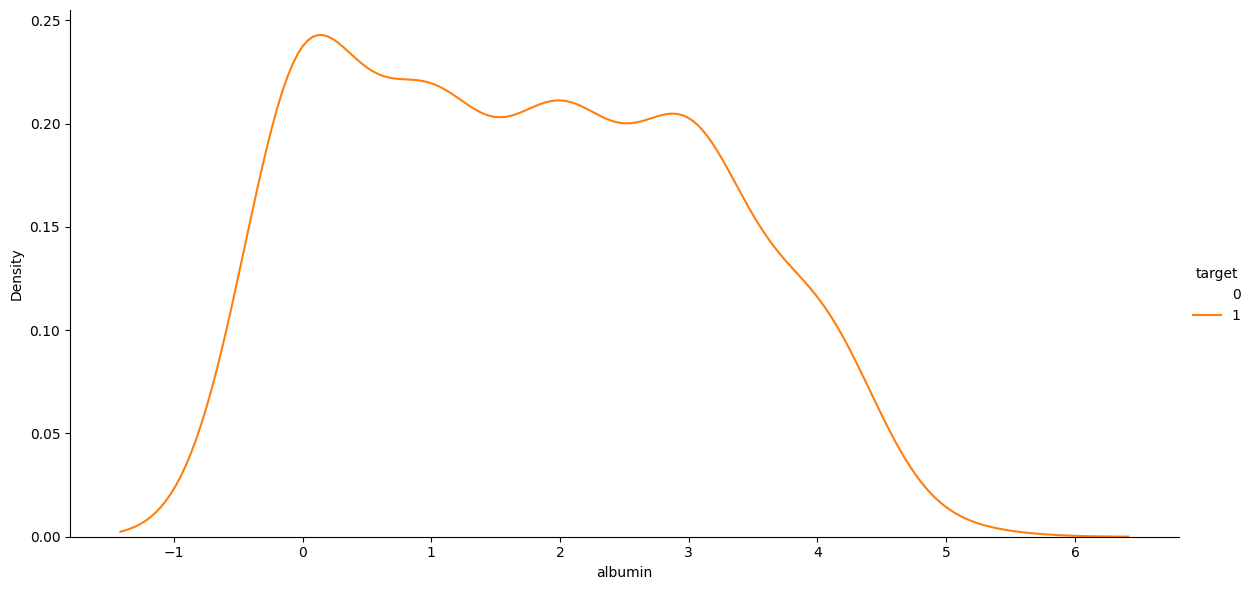

In [39]:
kde('albumin')

In [40]:
violin('blood_glucose_random')

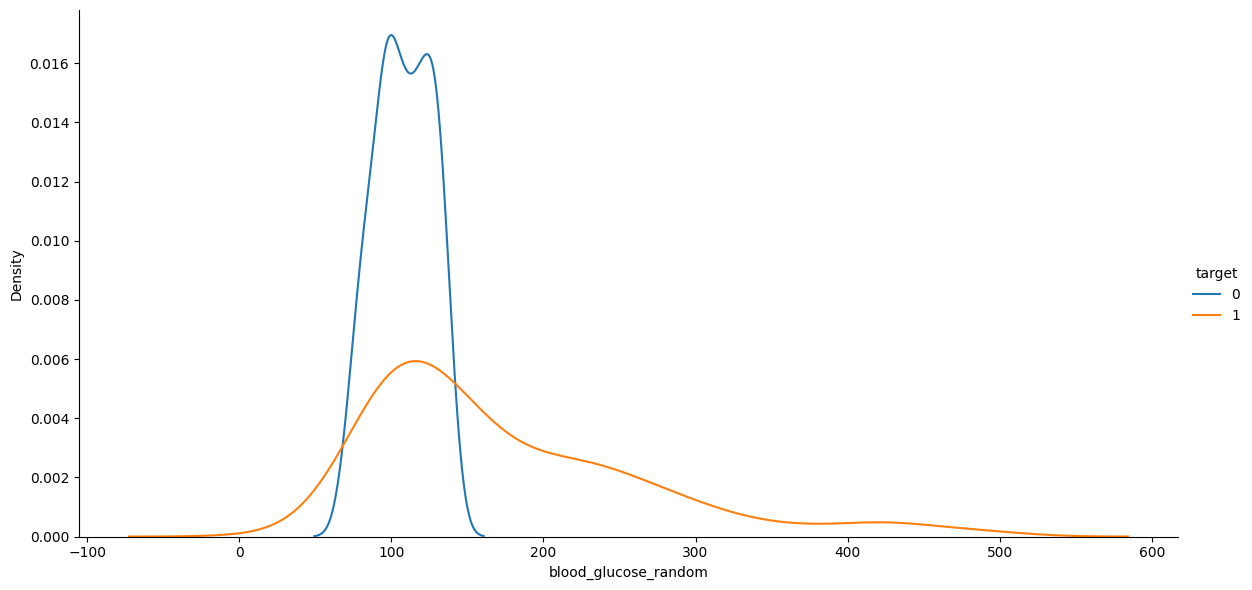

In [41]:
kde('blood_glucose_random')

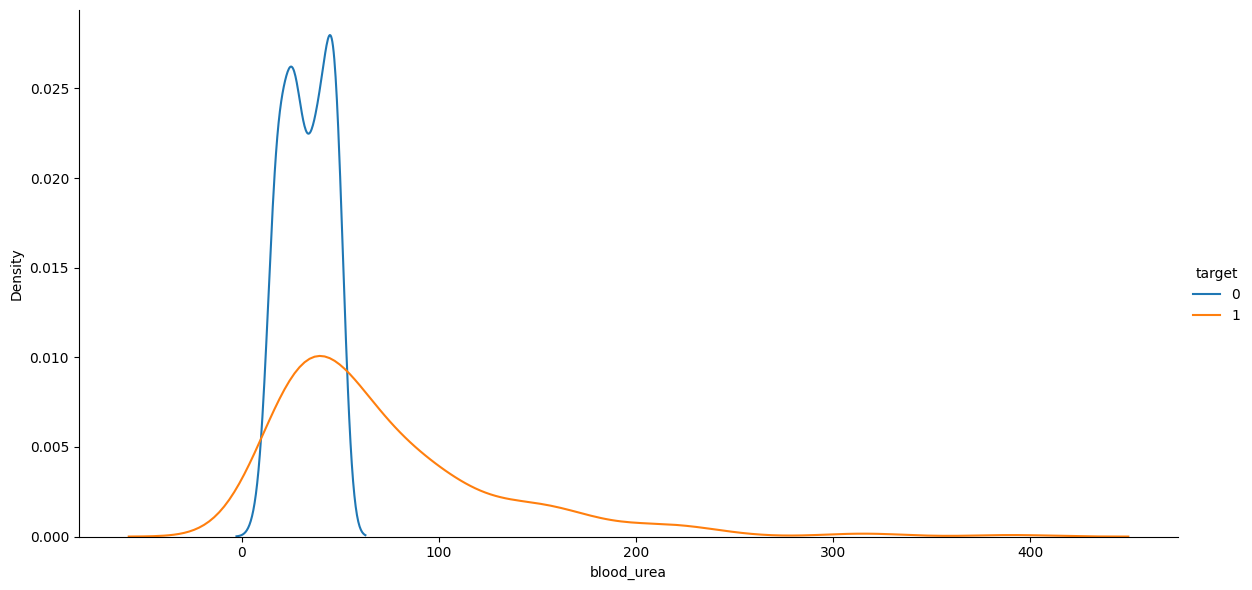

In [42]:
violin('blood_urea')
kde('blood_urea')

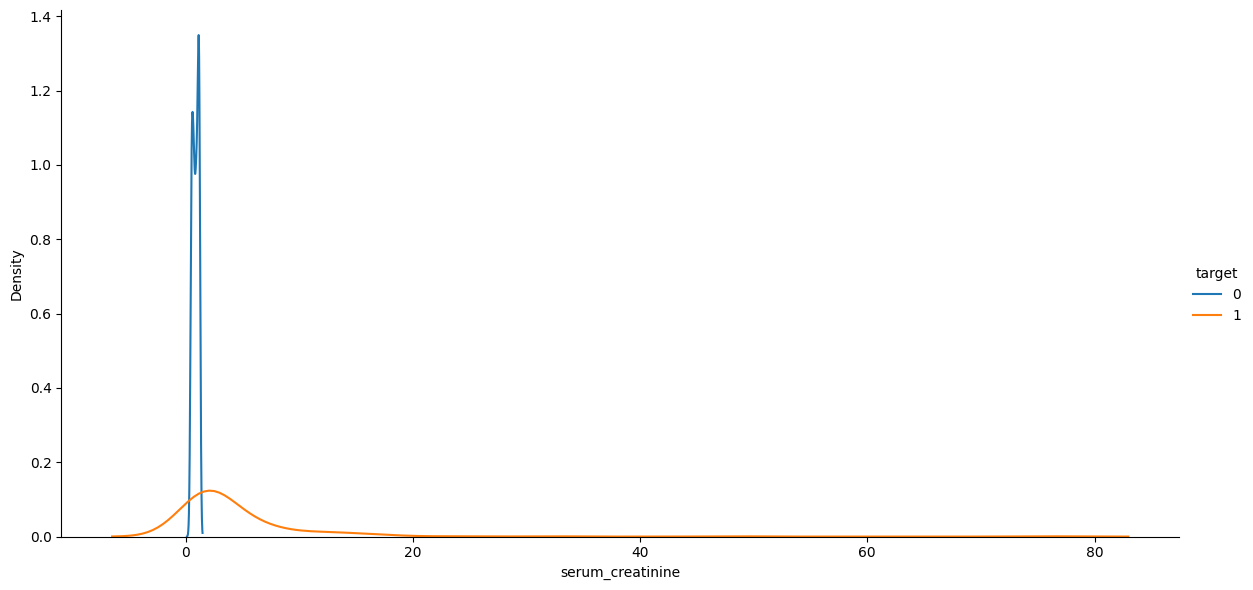

In [43]:
violin('serum_creatinine')
kde('serum_creatinine')

In [44]:
scatter('haemoglobin', 'packed_cell_volume')

In [45]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [46]:
scatter('white_blood_cell_count', 'packed_cell_volume')

In [47]:
scatter('sugar', 'blood_glucose_random')

In [48]:
scatter('red_blood_cell_count', 'albumin')

In [49]:
scatter('packed_cell_volume', 'blood_urea')

Pairplot for selected numerical features:


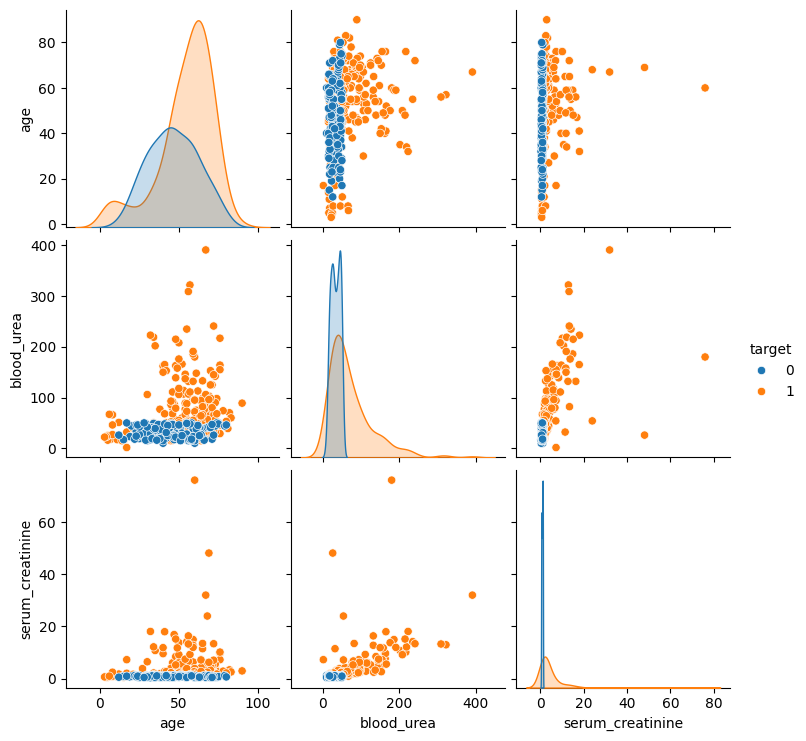

In [54]:
#pairplot for few numerical features
print("Pairplot for selected numerical features:")
sns.pairplot(df, vars=['age', 'blood_urea', 'serum_creatinine'], hue='target')

In [53]:
#bar plots for specific features
px.bar(df, x="specific_gravity", y="packed_cell_volume", 
       color='target', barmode='group', template = 'plotly', height = 400,title='Bar Plot of Specific Gravity vs Packed Cell Volume by Target Class')

In [52]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", 
       color='target', barmode='group', template = 'plotly', height = 400,title='Bar Plot of Blood Pressure vs Packed Cell Volume by Target Class')

In [55]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='target', barmode='group', template = 'plotly', height = 400,title='Bar Plot of Blood Pressure vs Haemoglobin by Target Class')

<Axes: xlabel='target', ylabel='albumin'>

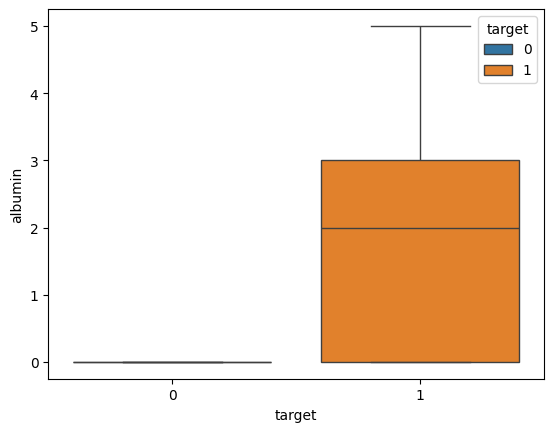

In [ ]:
#boxplots for features vs target
sns.boxplot(data=df, x='target', y='albumin',hue='target')

<Axes: xlabel='target', ylabel='blood_glucose_random'>

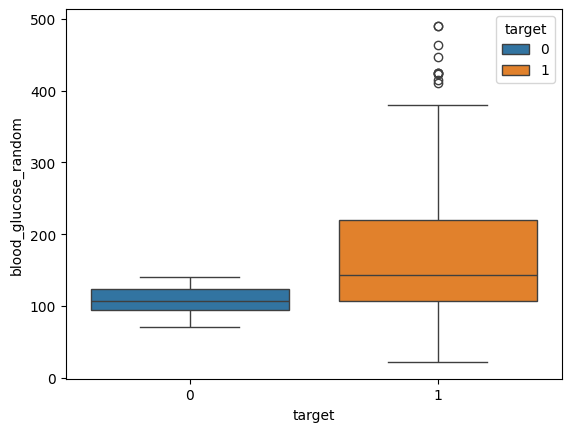

In [ ]:
sns.boxplot(data=df, x='target', y='blood_glucose_random',hue='target')
sns.update_layout(title='Box Plot of Blood Glucose Random by Target Class')

C:\Users\HP\AppData\Local\Temp\ipykernel_10016\4214785931.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='target', ylabel='packed_cell_volume'>

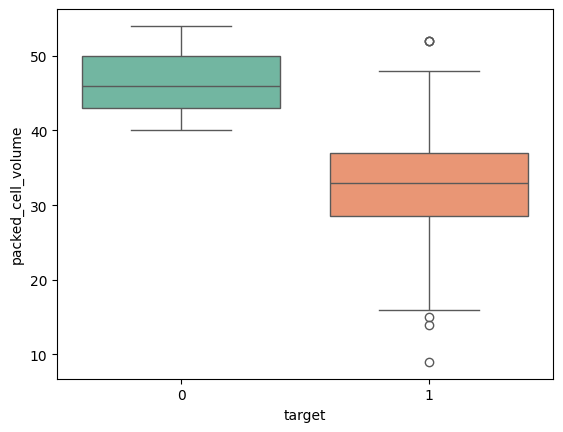

In [ ]:
sns.boxplot(data=df, x='target', y='packed_cell_volume',hue='target', palette='Set2')
sns.update_layout(title='Box Plot of Packed Cell Volume by Target Class')

<Axes: xlabel='target', ylabel='blood_urea'>

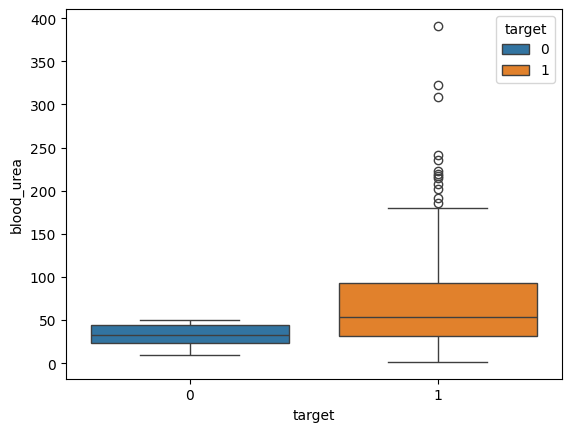

In [ ]:
sns.boxplot(data=df, x='target', y='blood_urea',hue='target')
sns.update_layout(title='Box Plot of Blood Urea by Target Class')

In [ ]:
fig = px.pie(df, names='hypertension', hole=0.4,
             title='Hypertension Distribution in Dataset',
             color_discrete_sequence=px.colors.sequential.Tealgrn,width=400, height=400)
fig.show()


In [ ]:
ckd_df = df[df['target'] == 1]  # Only CKD patients
fig = px.pie(ckd_df, names='anemia', hole=0.4,
             title='Anemia Distribution among CKD Patients',height=400, width=400)
fig.show()


group wise summary statistics

In [ ]:
df['target'].value_counts(normalize=True)

target
1    0.625
0    0.375
Name: proportion, dtype: float64

In [ ]:
numerical_cols.groupby('target').mean()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
target,,,,,,,,,,,,,,
0,46.516779,71.351351,1.022414,0.000000,0.00000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194,46.335616,7705.594406,5.379021
1,54.541322,79.625000,1.013918,1.722488,0.76699,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549,32.939891,9069.536424,3.945238


In [ ]:
numerical_cols.groupby('target').median()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
target,,,,,,,,,,,,,,
0,46.0,70.0,1.020,0.0,0.0,107.5,33.0,0.90,141.0,4.5,15.0,46.0,7500.0,5.3
1,59.0,80.0,1.015,2.0,0.0,143.5,53.0,2.25,136.0,4.3,10.9,33.0,8800.0,3.9


In [ ]:
df.groupby('target')[['haemoglobin', 'serum_creatinine','blood_urea']].agg(['mean', 'std', 'median'])

haemoglobin                  serum_creatinine                   \
              mean       std median             mean       std median   
target                                                                  
0        15.188194  1.277536   15.0         0.868966  0.255092   0.90   
1        10.647549  2.185790   10.9         4.414916  6.950275   2.25   

       blood_urea                    
             mean        std median  
target                               
0       32.798611  11.450459   33.0  
1       72.389030  58.587236   53.0

In [ ]:
df.groupby('target')[['red_blood_cell_count','white_blood_cell_count','packed_cell_volume']].agg(['mean', 'std', 'median'])


red_blood_cell_count                  white_blood_cell_count  \
                       mean       std median                   mean   
target                                                                
0                  5.379021  0.596097    5.3            7705.594406   
1                  3.945238  0.865296    3.9            9069.536424   

                            packed_cell_volume                   
                std  median               mean       std median  
target                                                           
0       1839.770968  7500.0          46.335616  4.134426   46.0  
1       3580.521254  8800.0          32.939891  7.208945   33.0

In [ ]:
df.groupby('target')[['sodium','potassium','sugar']].agg(['mean', 'std', 'median'])


sodium                   potassium                     sugar  \
              mean        std median      mean       std median     mean   
target                                                                     
0       141.731034   4.817871  141.0  4.337931  0.587257    4.5  0.00000   
1       133.901786  12.402827  136.0  4.878443  4.321550    4.3  0.76699   

                         
             std median  
target                   
0       0.000000    0.0  
1       1.348559    0.0

In [ ]:
numerical_cols.skew().sort_values(ascending=False)

potassium                 11.582956
serum_creatinine           7.509538
blood_urea                 2.634374
sugar                      2.464262
blood_glucose_random       2.010773
white_blood_cell_count     1.621589
blood_pressure             1.605429
albumin                    0.998157
specific_gravity          -0.172444
red_blood_cell_count      -0.183329
haemoglobin               -0.335095
packed_cell_volume        -0.433679
target                    -0.518344
age                       -0.668259
sodium                    -6.996569
dtype: float64

Data preprocessing

In [ ]:
# checking for null , NaN values
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
target                       0
dtype: int64

In [ ]:
numerical_cols.isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
target                      0
dtype: int64

In [ ]:
categorical_cols.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
dtype: int64

In [ ]:
#handling missing values
threshold = 0.3  # Threshold for high-null

# Handle numerical columns
for col in numerical_cols.columns:
    null_pct = numerical_cols[col].isnull().mean()
    if null_pct < threshold:
        numerical_cols[col] = numerical_cols[col].fillna(numerical_cols[col].mean())
    else:
        random_sample = numerical_cols[col].dropna().sample(n=numerical_cols[col].isna().sum(), random_state=42)
        random_sample.index = numerical_cols[numerical_cols[col].isna()].index
        numerical_cols.loc[numerical_cols[col].isna(), col] = random_sample

# Handle categorical columns
for col in categorical_cols.columns:
    null_pct = categorical_cols[col].isnull().mean()
    if null_pct < threshold:
        categorical_cols[col] = categorical_cols[col].fillna(categorical_cols[col].mode()[0])
    else:
        random_sample = categorical_cols[col].dropna().sample(n=categorical_cols[col].isna().sum(), random_state=42)
        random_sample.index = categorical_cols[categorical_cols[col].isna()].index
        categorical_cols.loc[categorical_cols[col].isna(), col] = random_sample


In [ ]:
numerical_cols.isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
target                    0
dtype: int64

In [ ]:
categorical_cols.isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

In [ ]:
df[numerical_cols.columns] = numerical_cols
df[categorical_cols.columns] = categorical_cols
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
target                     0
dtype: int64

FEAUTURE ENCODING

In [ ]:
for col in categorical_cols.columns:
    print(f"{col}: {df[col].unique()}")

red_blood_cells: ['abnormal' 'normal']
pus_cell: ['normal' 'abnormal']
pus_cell_clumps: ['notpresent' 'present']
bacteria: ['notpresent' 'present']
hypertension: ['yes' 'no']
diabetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
appetite: ['good' 'poor']
pedal_edema: ['no' 'yes']
anemia: ['no' 'yes']


In [ ]:
binary_mapping = {
    'normal': 0, 'abnormal': 1,
    'notpresent': 0, 'present': 1,
    'no': 0, 'yes': 1,
    'good': 0, 'poor': 1
}

# Apply to all categorical columns
for col in categorical_cols.columns:
    df[col] = df[col].map(binary_mapping)


In [ ]:
print(df[categorical_cols.columns].head())
print(df.dtypes)

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  hypertension  \
0                1         0                0         0             1   
1                1         0                0         0             0   
2                0         0                0         0             0   
3                0         1                1         0             1   
4                0         0                0         0             0   

   diabetes_mellitus  coronary_artery_disease  appetite  pedal_edema  anemia  
0                  1                        0         0            0       0  
1                  0                        0         0            0       0  
2                  1                        0         1            0       1  
3                  0                        0         1            1       1  
4                  0                        0         0            0       0  
age                        float64
blood_pressure             float64
specific_gravity 

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,target
0,48.0,80.0,1.020,1.0,0.0,1,0,0,0,121.000000,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,0,0,0,148.036517,...,38.0,6000.0,3.5,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [ ]:
# Model Building

# Split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME',random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}
accuracies={}
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print(f"\nConfusion matrix: \n{confusion_matrix(y_test, preds)}")
    print("---------------------------------------------------------------------")


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion matrix: 
[[28  0]
 [ 0 52]]
---------------------------------------------------------------------

KNN Accuracy: 0.7250
              precision    recall  f1-score   support

           0       0.57      0.89      0.69        28
           1       0.92      0.63      0.75        52

    accuracy                           0.72        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80


Confusion matrix: 
[[25  3]
 [19 33]]
---------------------------------------------------------------------

Decision Tree Accuracy: 1.0000
              precision    recall  f1-scor

,Model,Accuracy
0,Random Forest,1.0000
2,Decision Tree,0.9875
3,Naive Bayes,0.9875
4,AdaBoost,0.9875
5,Gradient Boosting,0.9875
6,XGBoost,0.9875
1,KNN,0.7250


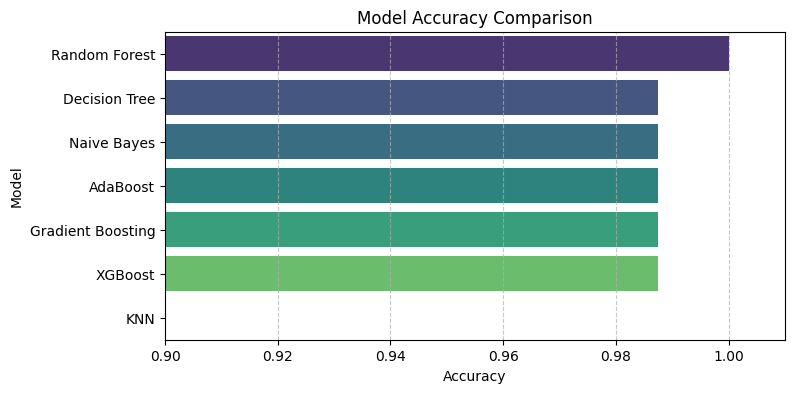

In [ ]:
# Create DataFrame for accuracy comparison
score_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
score_df.sort_values(by='Accuracy', ascending=False, inplace=True)
display(score_df)

# Plot accuracy comparison
plt.figure(figsize=(8, 4))
sns.barplot(data=score_df, x='Accuracy', y='Model', hue='Model',palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0.9, 1.01)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()